## Random Forest: Fit and evaluate a model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will fit and evaluate a simple Random Forest model.

### Read in Data

In [1]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv(r'E:\Programming\Python\Machine Learning\Ex_Files_Machine_Learning_Algorithms\Exercise Files\train_features.csv')
tr_labels = pd.read_csv(r'E:\Programming\Python\Machine Learning\Ex_Files_Machine_Learning_Algorithms\Exercise Files\train_labels.csv', header=None)

### Hyperparameter tuning

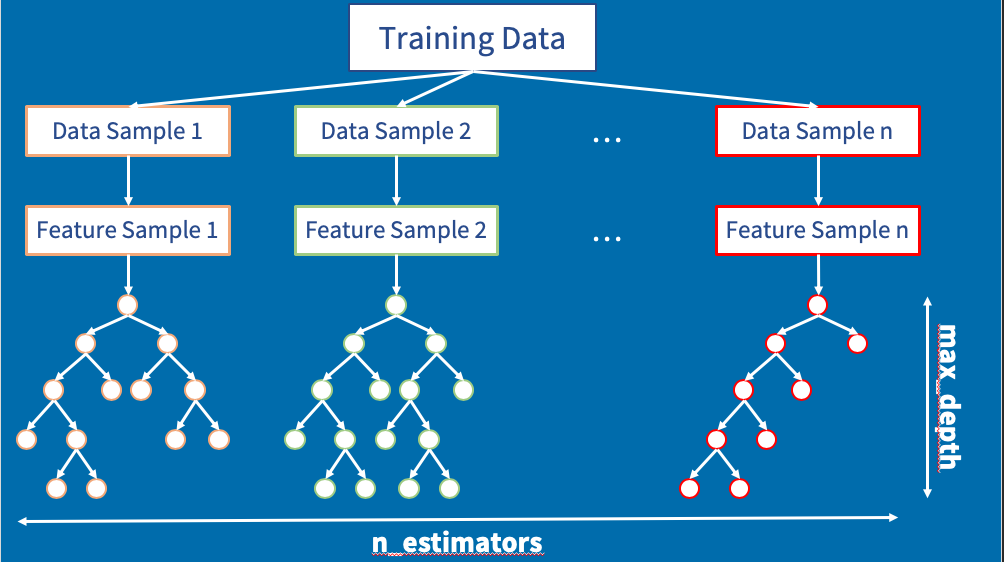

In [2]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [3]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,250],
    'max_depth': [2,4,8,16,32,None]
}

cv=GridSearchCV(rf,parameters,cv=5)
cv.fit(tr_features,tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 5}

0.785 (+/-0.107) for {'max_depth': 2, 'n_estimators': 5}
0.781 (+/-0.13) for {'max_depth': 2, 'n_estimators': 50}
0.787 (+/-0.13) for {'max_depth': 2, 'n_estimators': 250}
0.8 (+/-0.109) for {'max_depth': 4, 'n_estimators': 5}
0.822 (+/-0.098) for {'max_depth': 4, 'n_estimators': 50}
0.822 (+/-0.105) for {'max_depth': 4, 'n_estimators': 250}
0.826 (+/-0.067) for {'max_depth': 8, 'n_estimators': 5}
0.817 (+/-0.065) for {'max_depth': 8, 'n_estimators': 50}
0.818 (+/-0.076) for {'max_depth': 8, 'n_estimators': 250}
0.803 (+/-0.043) for {'max_depth': 16, 'n_estimators': 5}
0.807 (+/-0.014) for {'max_depth': 16, 'n_estimators': 50}
0.815 (+/-0.034) for {'max_depth': 16, 'n_estimators': 250}
0.785 (+/-0.056) for {'max_depth': 32, 'n_estimators': 5}
0.803 (+/-0.034) for {'max_depth': 32, 'n_estimators': 50}
0.815 (+/-0.037) for {'max_depth': 32, 'n_estimators': 250}
0.796 (+/-0.047) for {'max_depth': None, 'n_estimators': 5}
0.813 (+/-0.049) f

### Write out pickled model

In [4]:
joblib.dump(cv.best_estimator_,r'E:\Programming\Python\Machine Learning\Ex_Files_Machine_Learning_Algorithms\Exercise Files\05_RF\RF_model.pkl')

['E:\\Programming\\Python\\Machine Learning\\Ex_Files_Machine_Learning_Algorithms\\Exercise Files\\05_RF\\RF_model.pkl']